In [432]:
'''
Objectives (from https://piazza.com/class/ktuxvlqye5v3tz?cid=82):

First, we're asking you to build a predictive model for future sales of a particular product.
You'll want to use the entire market dataset to help train the model, but ultimately you want
to be able to plug in a specific product and generate a sales forecast. The obvious use-case
here is Cookies is trying to project out potential demand so they can make immediate decisions
in terms of investment and cultivation. We don't offer a precise prediction window (monthly,
quarterly etc.) but monthly projections are probably a good way to start. 

The second objective is to identify key features associated with high sales performance. There
are multiple ways to go about this but the easiest is to examine statistical significance and
coefficient magnitude associated with individual features. The practical goal here is to offer
market trends and advice on product areas where Cookies may want to develop new product lines
to meet pent up demand.

Once complete...
TODO: organize all imports into this cell
TODO: add more writing to the markdown cells and comments within the code

'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt

np.random.seed(42)

In [433]:
price = pd.read_csv('data/BrandAverageRetailPrice.csv')
details = pd.read_csv('data/BrandDetails.csv')
sales = pd.read_csv('data/BrandTotalSales.csv')
units = pd.read_csv('data/BrandTotalUnits.csv')

# storing all of the dataframes in a dictionary for easier use
dfs = {
    'price': price,
    'details': details,
    'sales': sales,
    'units': units,
}

In [434]:
price

,Brands,Months,ARP,vs. Prior Period
0,#BlackSeries,08/2020,15.684913,NaN
1,#BlackSeries,09/2020,NaN,-1.000000
2,#BlackSeries,01/2021,13.611428,NaN
3,#BlackSeries,02/2021,11.873182,-0.127705
4,#BlackSeries,03/2021,NaN,-1.000000
...,...,...,...,...
27206,Zuma Topicals,08/2019,31.598214,NaN
27207,Zuma Topicals,09/2019,37.860964,0.198199
27208,Zuma Topicals,10/2019,34.546154,-0.087552
27209,Zuma Topicals,11/2019,36.850000,0.066689


In [435]:
details

,State,Channel,Category L1,Category L2,Category L3,Category L4,Category L5,Brand,Product Description,Total Sales ($),...,Total THC,Total CBD,Contains CBD,Pax Filter,Strain,Is Flavored,Mood Effect,Generic Vendor,Generic Items,$5 Price Increment
0,California,Licensed,Inhaleables,Flower,Hybrid,NaN,NaN,#BlackSeries,#BlackSeries - Vanilla Frosting - Flower (Gram),"1,103.964857",...,0,0,THC Only,NaN,Vanilla Frosting,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$10.00 to $14.99
1,California,Licensed,Inhaleables,Flower,Hybrid,NaN,NaN,#BlackSeries,#BlackSeries - Vanilla Frosting - Flower (Gram),674.645211,...,0,0,THC Only,NaN,Vanilla Frosting,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$15.00 to $19.99
2,California,Licensed,Inhaleables,Flower,Sativa Dominant,NaN,NaN,#BlackSeries,#BlackSeries - Blueberry Slushy - Flower (Gram),"2,473.699102",...,0,0,THC Only,NaN,Blueberry Slushy,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$15.00 to $19.99
3,California,Licensed,Inhaleables,Flower,Sativa Dominant,NaN,NaN,#BlackSeries,#BlackSeries - Blueberry Slushy - Flower (Gram),"14,589.916417",...,0,0,THC Only,NaN,Blueberry Slushy,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$10.00 to $14.99
4,California,Licensed,Inhaleables,Concentrates,Dabbable Concentrates,Wax,NaN,101 Cannabis Co.,101 Cannabis Co. - Afghan Kush - Wax,145.39627,...,0,0,THC Only,NaN,Afghan Kush,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$35.00 to $39.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144972,California,Licensed,Inhaleables,Concentrates,Dabbable Concentrates,Live Resin,NaN,Zkittlez,Zkittlez - Lemon Drop - Live Resin,"3,051.854478",...,0,0,THC Only,NaN,Lemon Drop,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$40.00 to $44.99
144973,California,Licensed,Inhaleables,Pre-Rolled,Pre-Rolled,NaN,NaN,Zkittlez,"Zkittlez - Blueberry Zkittlez - Pre-Rolled, 0....","6,776.219336",...,0,0,THC Only,NaN,Blueberry Zkittlez,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$35.00 to $39.99
144974,California,Licensed,Inhaleables,Concentrates,Dabbable Concentrates,Live Resin,NaN,Zkittlez,Zkittlez - Lemon Drop - Live Resin,"4,341.808787",...,0,0,THC Only,NaN,Lemon Drop,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$45.00 to $49.99
144975,California,Licensed,Inhaleables,Concentrates,Dabbable Concentrates,Live Resin,NaN,Zkittlez,Zkittlez - Lemon Drop - Live Resin,"6,764.1640020000000",...,0,0,THC Only,NaN,Lemon Drop,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$60.00 to $64.99


In [436]:
sales

,Months,Brand,Total Sales ($)
0,09/2018,10x Infused,"1,711.334232"
1,09/2018,1964 Supply Co.,"25,475.21594500000"
2,09/2018,3 Bros Grow,"120,153.644757"
3,09/2018,3 Leaf,"6,063.5297850000000"
4,09/2018,350 Fire,"631,510.0481550000"
...,...,...,...
25274,09/2021,Yummi Karma,"458,600.9132630000"
25275,09/2021,Zanna,"3,681.159375"
25276,09/2021,Zendo Edibles,"11,508.213813"
25277,09/2021,Zig Zag,"18,077.309311"


In [437]:
units

,Brands,Months,Total Units,vs. Prior Period
0,#BlackSeries,08/2020,"1,616.3390040000000",NaN
1,#BlackSeries,09/2020,NaN,-1.000000
2,#BlackSeries,01/2021,715.5328380000000,NaN
3,#BlackSeries,02/2021,766.669135,0.071466
4,#BlackSeries,03/2021,NaN,-1.000000
...,...,...,...,...
27681,Zuma Topicals,08/2019,312.5153360000000,NaN
27682,Zuma Topicals,09/2019,464.30631600000000,0.485707
27683,Zuma Topicals,10/2019,348.057905,-0.250370
27684,Zuma Topicals,11/2019,135.92208,-0.609484


In [438]:
price.describe(include='all')

,Brands,Months,ARP,vs. Prior Period
count,27211,27211,25279.000000,24499.000000
unique,1627,37,NaN,NaN
top,Blue River Extracts,06/2021,NaN,NaN
freq,37,909,NaN,NaN
mean,NaN,NaN,22.679732,-0.065028
std,NaN,NaN,19.802724,0.388923
min,NaN,NaN,0.000000,-1.000000
25%,NaN,NaN,10.512827,-0.088073
50%,NaN,NaN,17.033051,-0.011649
75%,NaN,NaN,31.505612,0.045232


In [439]:
details.describe(include='all')

,State,Channel,Category L1,Category L2,Category L3,Category L4,Category L5,Brand,Product Description,Total Sales ($),...,Total THC,Total CBD,Contains CBD,Pax Filter,Strain,Is Flavored,Mood Effect,Generic Vendor,Generic Items,$5 Price Increment
count,144977,144977,144977,144977,144245,102618,50135,144977,144977,144977,...,144977,144977,144977,44301,115639,11287,144977,144977,144977,144977
unique,1,1,5,13,53,71,38,1123,32608,133144,...,136,149,2,2,5824,2,2,2,2,22
top,California,Licensed,Inhaleables,Concentrates,Vape,Vape Cartridge,Live Resin Cartridge,Raw Garden,"Pre Rolled - Strain Blends - Pre-Rolled, 1.00g...",168.17203,...,0,0,THC Only,Not Pax,Hybrid Strain Blends,Flavored,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$25.00 to $29.99
freq,144977,144977,121859,83534,44301,38488,19962,9004,790,136,...,130154,138362,134332,42135,4936,7807,137990,137370,138667,13832
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [440]:
sales.describe(include='all')

,Months,Brand,Total Sales ($)
count,25279,25279,25279
unique,37,1627,25277
top,05/2021,Valhalla,0
freq,848,37,3


In [441]:
units.describe(include='all')

,Brands,Months,Total Units,vs. Prior Period
count,27686,27686,25712,24935.000000
unique,1640,38,24494,NaN
top,Absolute Xtracts,06/2021,25.131084000000000,NaN
freq,38,909,6,NaN
mean,NaN,NaN,NaN,0.265306
std,NaN,NaN,NaN,3.291373
min,NaN,NaN,NaN,-1.000000
25%,NaN,NaN,NaN,-0.351822
50%,NaN,NaN,NaN,-0.055216
75%,NaN,NaN,NaN,0.240113


In [442]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25279 entries, 0 to 25278
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Months           25279 non-null  object
 1   Brand            25279 non-null  object
 2   Total Sales ($)  25279 non-null  object
dtypes: object(3)
memory usage: 592.6+ KB


In [443]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27211 entries, 0 to 27210
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brands            27211 non-null  object 
 1   Months            27211 non-null  object 
 2   ARP               25279 non-null  float64
 3   vs. Prior Period  24499 non-null  float64
dtypes: float64(2), object(2)
memory usage: 850.5+ KB


In [444]:
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144977 entries, 0 to 144976
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   State                144977 non-null  object 
 1   Channel              144977 non-null  object 
 2   Category L1          144977 non-null  object 
 3   Category L2          144977 non-null  object 
 4   Category L3          144245 non-null  object 
 5   Category L4          102618 non-null  object 
 6   Category L5          50135 non-null   object 
 7   Brand                144977 non-null  object 
 8   Product Description  144977 non-null  object 
 9   Total Sales ($)      144977 non-null  object 
 10  Total Units          144977 non-null  object 
 11  ARP                  144977 non-null  float64
 12  Flavor               7807 non-null    object 
 13  Items Per Pack       144977 non-null  int64  
 14  Item Weight          64454 non-null   object 
 15  Total THC        

In [445]:
units.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27686 entries, 0 to 27685
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brands            27686 non-null  object 
 1   Months            27686 non-null  object 
 2   Total Units       25712 non-null  object 
 3   vs. Prior Period  24935 non-null  float64
dtypes: float64(1), object(3)
memory usage: 865.3+ KB


## 1. Merging datasets
Merging datasets and linking information into a single dataframe for analysis.

Since `details` was the only dataframe with any columns with a single unique value, we can drop all of these columns since they are redundant.

In [446]:
def drop_identical_data(df):
    '''
    Drop columns that contain only 1 unique value.
    
    Args:
        df: Dataframe
    Returns:
        Dataframe with columns that have 2 or more unique
        values each.
    '''
    for column in df.columns:
        if len(df[column].unique()) == 1:
            df = df.drop(column, axis=1)
            print(f'Dropped {column}')
    return df

for i in dfs:
    dfs[i] = drop_identical_data(dfs[i])

Dropped State
Dropped Channel


For consistency, renaming `Brands` to `Brand` and placing `Brand` column at the start of every dataframe.

In [447]:
def move_to_front(label, df):
    '''
    Moves column `label` to the front of the dataframe. If label
    doesn't exist, it will return `df` untouched.
    
    Args:
        column: str
        df: Dataframe
    Returns:
        Dataframe with `label` in the front (index 0)
    '''
    if label not in df.columns: return df
    column = df[label]
    df = df.drop(label, axis=1)
    df.insert(0, label, column)
    return df

# renaming brands to brand
for i in dfs:
    if 'Brands' in dfs[i].columns:
        dfs[i] = dfs[i].rename(columns={'Brands': 'Brand'})
        
# reording columns
for i in dfs:
    dfs[i] = move_to_front('Brand', dfs[i])


In [448]:
for i in dfs:
    print(i, dfs[i].columns)

price Index(['Brand', 'Months', 'ARP', 'vs. Prior Period'], dtype='object')
details Index(['Brand', 'Category L1', 'Category L2', 'Category L3', 'Category L4',
       'Category L5', 'Product Description', 'Total Sales ($)', 'Total Units',
       'ARP', 'Flavor', 'Items Per Pack', 'Item Weight', 'Total THC',
       'Total CBD', 'Contains CBD', 'Pax Filter', 'Strain', 'Is Flavored',
       'Mood Effect', 'Generic Vendor', 'Generic Items', '$5 Price Increment'],
      dtype='object')
sales Index(['Brand', 'Months', 'Total Sales ($)'], dtype='object')
units Index(['Brand', 'Months', 'Total Units', 'vs. Prior Period'], dtype='object')


Since sales are the most important part, we will start with the `sales` dataframe to construct our main dataframe. From there we will add the `price` and `units` dataframes because they are the most similar (they all have `Brand` and `Months` columns).

In [449]:
# merge sales and price into df (and rename `vs. Prior Period` to `vs. Prior Period (ARP)`
df = pd.merge(dfs['sales'], dfs['price'], on=['Brand', 'Months'], how='left')
# merge df and units into df
df = pd.merge(df, dfs['units'], on=['Brand', 'Months'], how='left')
# renaming `vs. Prior Period` columns
df = df.rename(columns={
    'vs. Prior Period_x': 'vs. Prior Period (ARP)',
    'vs. Prior Period_y': 'vs. Prior Period (units)',
})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25279 entries, 0 to 25278
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Brand                     25279 non-null  object 
 1   Months                    25279 non-null  object 
 2   Total Sales ($)           25279 non-null  object 
 3   ARP                       25279 non-null  float64
 4   vs. Prior Period (ARP)    22570 non-null  float64
 5   Total Units               25279 non-null  object 
 6   vs. Prior Period (units)  22961 non-null  float64
dtypes: float64(3), object(4)
memory usage: 1.5+ MB


### Numeric Values
Convert `Total Sales ($)` and `Total Units` from a `str` column to a `float64` column.

In [450]:
df['Total Sales ($)'] = df['Total Sales ($)'].str.replace(',','').astype(float)
df['Total Units'] = df['Total Units'].str.replace(',','').astype(float)
df

,Brand,Months,Total Sales ($),ARP,vs. Prior Period (ARP),Total Units,vs. Prior Period (units)
0,10x Infused,09/2018,1711.334232,11.980833,NaN,142.839336,-0.833098
1,1964 Supply Co.,09/2018,25475.215945,10.634459,NaN,2395.534726,-0.184675
2,3 Bros Grow,09/2018,120153.644757,11.992592,NaN,10018.989140,-0.577103
3,3 Leaf,09/2018,6063.529785,5.507027,NaN,1101.053215,-0.672014
4,350 Fire,09/2018,631510.048155,9.847509,NaN,64128.910286,-0.216338
...,...,...,...,...,...,...,...
25274,Yummi Karma,09/2021,458600.913263,35.948296,-0.010775,12757.236391,-0.074458
25275,Zanna,09/2021,3681.159375,8.069769,NaN,456.166632,NaN
25276,Zendo Edibles,09/2021,11508.213813,15.983929,-0.009880,719.986537,-0.226109
25277,Zig Zag,09/2021,18077.309311,2.702687,-0.005564,6688.643227,-0.184473


In [451]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25279 entries, 0 to 25278
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Brand                     25279 non-null  object 
 1   Months                    25279 non-null  object 
 2   Total Sales ($)           25279 non-null  float64
 3   ARP                       25279 non-null  float64
 4   vs. Prior Period (ARP)    22570 non-null  float64
 5   Total Units               25279 non-null  float64
 6   vs. Prior Period (units)  22961 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.5+ MB


Extracting brand-specific data from the `details` dataframe. For example, each brand will have a one-hot encoding of what strains it has, however it could be more than one strain since a brand could have multiple products. Below we are exploring which features to extract and use for the main `df`.

In [452]:
for label in details.columns:
    print(f'{label}, {details[label].dtype}, unique: {len(details[label].unique())}')

State, object, unique: 1
Channel, object, unique: 1
Category L1, object, unique: 5
Category L2, object, unique: 13
Category L3, object, unique: 54
Category L4, object, unique: 72
Category L5, object, unique: 39
Brand, object, unique: 1123
Product Description, object, unique: 32608
Total Sales ($), object, unique: 133144
Total Units, object, unique: 96910
ARP, float64, unique: 131319
Flavor, object, unique: 496
Items Per Pack, int64, unique: 33
Item Weight, object, unique: 70
Total THC, object, unique: 136
Total CBD, object, unique: 149
Contains CBD, object, unique: 2
Pax Filter, object, unique: 3
Strain, object, unique: 5825
Is Flavored, object, unique: 3
Mood Effect, object, unique: 2
Generic Vendor, object, unique: 2
Generic Items, object, unique: 2
$5 Price Increment, object, unique: 22


### Selecting which features to add
From the info above, we can see that a handful of features have such few unique values, that they themselves can become features in our main dataframe. For example, if #BlackSeries offers inhaleables (under the `L1 Category` column), we can have a column called `inhaleables` that will have a `1` for #BlackSeries and all other brands that offer it, and a `0` if they don't offer it. This logic will be used for all columns in the `details` dataframe that have a reasonable amount of unique values. We will consider 20 or less unique values in a column to be a "reasonable" amount, so our final dataframe doesn't end up with 100+ features.

In [453]:
[label for label in details.columns if 2 < len(details[label].unique()) <= 20]

['Category L1', 'Category L2', 'Pax Filter', 'Is Flavored']

Of these features, we know that `Pax Filter` and `Is Flavored` are actually binary, it's just that they have some `NaN` values which make them have 3 unique values. While we fix this, we can also convert the other columns with only two unique values into binary columns.

In [454]:
len(details[details['Pax Filter'] == 'Pax']), len(details[details['Pax Filter'] == 'Not Pax'])
details['Is Flavored'].unique()
[(label, details[label].unique()) for label in details.columns if 2 <= len(details[label].unique()) <= 3]

[('Contains CBD', array(['THC Only', 'Contains CBD'], dtype=object)),
 ('Pax Filter', array([nan, 'Not Pax', 'Pax'], dtype=object)),
 ('Is Flavored', array([nan, 'Not Flavored', 'Flavored'], dtype=object)),
 ('Mood Effect', array(['Not Mood Specific', 'Mood Specific'], dtype=object)),
 ('Generic Vendor',
  array(['Non-Generic Vendors', 'Generic Vendors'], dtype=object)),
 ('Generic Items',
  array(['Non-Generic Items', 'Generic Items'], dtype=object))]

In [455]:
def clean_binary_details(details: pd.DataFrame):
    ''''''
    labels = {
        'Contains CBD': 'Contains CBD',
        'Pax Filter': 'Pax',
        'Is Flavored': 'Flavored',
        'Mood Effect': 'Mood Specific',
        'Generic Vendor': 'Generic Vendors',
        'Generic Items': 'Generic Items',
    }
    for label,correct in labels.items():
        details[label] = details[label].apply(lambda x : True if x == correct or x == True else False)
    return details

details = clean_binary_details(details)

Now if we take a look at all columns that have between (2,20] unique elements, it's just `Category L1` and `Category L2`.

In [456]:
[label for label in details.columns if 2 < len(details[label].unique()) <= 20]

['Category L1', 'Category L2']

For the rest of the columns with only two unique values, we will turn those into binary columns as well.

In [481]:
def combine(sales, units, details, price):
    dfs = [sales, units, details, price]

    # dropping columns with identical values
    for i in range(len(dfs)):
        dfs[i] = drop_identical_data(dfs[i])

    # renaming brands to brand
    for i in range(len(dfs)):
        if 'Brands' in dfs[i].columns:
            dfs[i] = dfs[i].rename(columns={'Brands': 'Brand'})
            
    # reording columns
    for i in range(len(dfs)):
        dfs[i] = move_to_front('Brand', dfs[i])

    sales, units, details, price = dfs

    # merge sales and price into df (and rename `vs. Prior Period` to `vs. Prior Period (ARP)`
    df = pd.merge(sales, price, on=['Brand', 'Months'], how='left')
    # merge df and units into df
    df = pd.merge(df, units, on=['Brand', 'Months'], how='left')
    # renaming `vs. Prior Period` columns
    df = df.rename(columns={
        'vs. Prior Period_x': 'vs. Prior Period (ARP)',
        'vs. Prior Period_y': 'vs. Prior Period (units)',
    })

    # cleaning numeric values
    df['Total Sales ($)'] = df['Total Sales ($)'].str.replace(',','').astype(float)
    df['Total Units'] = df['Total Units'].str.replace(',','').astype(float)

    # replace vs. Prior Period columns NaN with 0
    vs_labels = ['vs. Prior Period (ARP)', 'vs. Prior Period (units)']
    df[vs_labels] = df[vs_labels].fillna(0)

    # for each brand, if the column has a 1, then it offers that type of product,
    # otherwise it does not offer that type of product
    binary_labels = []
    for label in details.columns:
        if details[label].dtype == bool or label == 'Brand':
            binary_labels.append(label)
    binary_df = details[binary_labels]
    binary_df = binary_df.pivot_table(index='Brand', aggfunc=np.max)
    binary_df.reset_index(inplace=True)

    # pivot Category L1 and L2 such that we have the 
    l1_df = details[['Brand', 'Category L1']].pivot_table(index='Brand', columns='Category L1', aggfunc=lambda x:True, fill_value=False)
    l2_df = details[['Brand', 'Category L2']].pivot_table(index='Brand', columns='Category L2', aggfunc=lambda x:True, fill_value=False)
    l_df = pd.merge(l1_df, l2_df, on=['Brand'], how='left')
    l_df = l_df.drop(['Topicals_x', 'Topicals_y', 'Other Cannabis_x', 'Other Cannabis_y'], axis=1)
    l_df.reset_index(inplace=True)

    # add binary_df to l_df
    merge_df = pd.merge(l_df, binary_df, on=['Brand'], how='left')

    # combine it with main df
    final_df = pd.merge(df, merge_df, on=['Brand'], how='left')

    # clean-up (since a lot of the brands in the main dataset arent' described in details.csv, we
    # will have to replace all the NaN with False)
    new_labels = list(binary_df.columns) + list(l_df.columns)
    final_df[new_labels] = final_df[new_labels].fillna(False)
    
    return final_df


df = combine(sales, units, details, price)
df


Dropped State
Dropped Channel


,Brand,Months,Total Sales ($),ARP,vs. Prior Period (ARP),Total Units,vs. Prior Period (units),All Accessories,Ingestibles,Inhaleables,...,Non Infused Food,Pre-Rolled,Shake/Trim/Lite,Sublinguals,Contains CBD,Generic Items,Generic Vendor,Is Flavored,Mood Effect,Pax Filter
0,10x Infused,09/2018,1711.334232,11.980833,0.000000,142.839336,-0.833098,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1964 Supply Co.,09/2018,25475.215945,10.634459,0.000000,2395.534726,-0.184675,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3 Bros Grow,09/2018,120153.644757,11.992592,0.000000,10018.989140,-0.577103,False,False,True,...,False,True,False,False,False,False,False,False,False,False
3,3 Leaf,09/2018,6063.529785,5.507027,0.000000,1101.053215,-0.672014,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,350 Fire,09/2018,631510.048155,9.847509,0.000000,64128.910286,-0.216338,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25274,Yummi Karma,09/2021,458600.913263,35.948296,-0.010775,12757.236391,-0.074458,False,True,False,...,False,False,False,True,True,True,False,False,True,False
25275,Zanna,09/2021,3681.159375,8.069769,0.000000,456.166632,0.000000,False,False,True,...,False,False,False,False,False,False,False,False,False,False
25276,Zendo Edibles,09/2021,11508.213813,15.983929,-0.009880,719.986537,-0.226109,False,True,False,...,False,False,False,False,True,True,False,True,True,False
25277,Zig Zag,09/2021,18077.309311,2.702687,-0.005564,6688.643227,-0.184473,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [472]:
details[details['Pax Filter'] == True]

,State,Channel,Category L1,Category L2,Category L3,Category L4,Category L5,Brand,Product Description,Total Sales ($),...,Total THC,Total CBD,Contains CBD,Pax Filter,Strain,Is Flavored,Mood Effect,Generic Vendor,Generic Items,$5 Price Increment
6852,California,Licensed,Inhaleables,Concentrates,Vape,Vape Cartridge,Live Resin Cartridge,Almora Farm,Almora Farm - PAX Era - Charlie Girl - Live Re...,847.8014560000000,...,0,0,False,True,Charlie Girl,False,False,False,False,$30.00 to $34.99
6854,California,Licensed,Inhaleables,Concentrates,Vape,Vape Cartridge,Live Resin Cartridge,Almora Farm,Almora Farm - PAX Era - Charlie Girl - Live Re...,187.470395,...,0,0,False,True,Charlie Girl,False,False,False,False,Over $100
6855,California,Licensed,Inhaleables,Concentrates,Vape,Vape Cartridge,Live Resin Cartridge,Almora Farm,Almora Farm - PAX Era - Charlie Girl - Live Re...,"3,767.383938000000",...,0,0,False,True,Charlie Girl,False,False,False,False,$35.00 to $39.99
6856,California,Licensed,Inhaleables,Concentrates,Vape,Vape Cartridge,Live Resin Cartridge,Almora Farm,Almora Farm - PAX Era - Charlie Girl - Live Re...,"1,668.976678",...,0,0,False,True,Charlie Girl,False,False,False,False,$25.00 to $29.99
6857,California,Licensed,Inhaleables,Concentrates,Vape,Vape Cartridge,Live Resin Cartridge,Almora Farm,Almora Farm - PAX Era - Charlie Girl - Live Re...,"3,487.722048",...,0,0,False,True,Charlie Girl,False,False,False,False,$50.00 to $54.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140846,California,Licensed,Inhaleables,Concentrates,Vape,Vape Cartridge,Live Resin Cartridge,Utopia Farms,Utopia Farms - PAX Era - GG #4 - Live Resin Ca...,123.575381,...,0,0,False,True,GG #4,False,False,False,False,$30.00 to $34.99
140847,California,Licensed,Inhaleables,Concentrates,Vape,Vape Cartridge,Live Resin Cartridge,Utopia Farms,Utopia Farms - PAX Era - Chiquita Banana - Liv...,88.317194,...,0,0,False,True,Chiquita Banana,False,False,False,False,$20.00 to $24.99
140848,California,Licensed,Inhaleables,Concentrates,Vape,Vape Cartridge,Live Resin Cartridge,Utopia Farms,Utopia Farms - PAX Era - Chiquita Banana - Liv...,587.065123,...,0,0,False,True,Chiquita Banana,False,False,False,False,$25.00 to $29.99
140849,California,Licensed,Inhaleables,Concentrates,Vape,Vape Cartridge,Live Resin Cartridge,Utopia Farms,Utopia Farms - PAX Era - Chiquita Banana - Liv...,"2,627.272196",...,0,0,False,True,Chiquita Banana,False,False,False,False,$35.00 to $39.99


## 2. Time Series Extraction
Developing timeseries features to augment the dataset and to enable timeseries predictive models. 

In [488]:
# convert to datetime object, then into an ordinal
df['Months'] = pd.to_datetime(df['Months']).map(dt.datetime.toordinal)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25279 entries, 0 to 25278
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Brand                     25279 non-null  object 
 1   Months                    25279 non-null  int64  
 2   Total Sales ($)           25279 non-null  float64
 3   ARP                       25279 non-null  float64
 4   vs. Prior Period (ARP)    25279 non-null  float64
 5   Total Units               25279 non-null  float64
 6   vs. Prior Period (units)  25279 non-null  float64
 7   All Accessories           25279 non-null  bool   
 8   Ingestibles               25279 non-null  bool   
 9   Inhaleables               25279 non-null  bool   
 10  Accessories               25279 non-null  bool   
 11  Apparel                   25279 non-null  bool   
 12  Concentrates              25279 non-null  bool   
 13  Devices                   25279 non-null  bool   
 14  Edible

To make the dataframe more reable, we can rename the `Months` column to `Date`.

In [489]:
df = df.rename(columns={'Months': 'Date'})
df

,Brand,Date,Total Sales ($),ARP,vs. Prior Period (ARP),Total Units,vs. Prior Period (units),All Accessories,Ingestibles,Inhaleables,...,Non Infused Food,Pre-Rolled,Shake/Trim/Lite,Sublinguals,Contains CBD,Generic Items,Generic Vendor,Is Flavored,Mood Effect,Pax Filter
0,10x Infused,736938,1711.334232,11.980833,0.000000,142.839336,-0.833098,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1964 Supply Co.,736938,25475.215945,10.634459,0.000000,2395.534726,-0.184675,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3 Bros Grow,736938,120153.644757,11.992592,0.000000,10018.989140,-0.577103,False,False,True,...,False,True,False,False,False,False,False,False,False,False
3,3 Leaf,736938,6063.529785,5.507027,0.000000,1101.053215,-0.672014,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,350 Fire,736938,631510.048155,9.847509,0.000000,64128.910286,-0.216338,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25274,Yummi Karma,738034,458600.913263,35.948296,-0.010775,12757.236391,-0.074458,False,True,False,...,False,False,False,True,True,True,False,False,True,False
25275,Zanna,738034,3681.159375,8.069769,0.000000,456.166632,0.000000,False,False,True,...,False,False,False,False,False,False,False,False,False,False
25276,Zendo Edibles,738034,11508.213813,15.983929,-0.009880,719.986537,-0.226109,False,True,False,...,False,False,False,False,True,True,False,True,True,False
25277,Zig Zag,738034,18077.309311,2.702687,-0.005564,6688.643227,-0.184473,True,False,False,...,False,False,False,False,False,False,False,False,False,False


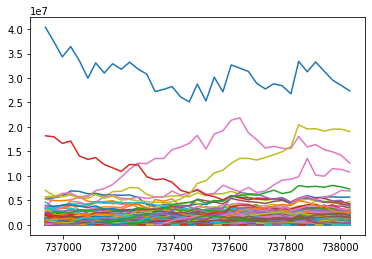

In [490]:
for brand in df['Brand'].unique():
    test_df = df[df['Brand'] == brand]
    plt.plot(test_df['Date'], test_df['Total Sales ($)'])

## 3. Statistics
Run basic statistics, including correlations with labels and report findings. Once we employ 'black box' methods such as PCA, the descriptive power of any of the features with disappear. However, this step is still important to report meaningful correlations to help flag key indicators.

In [491]:
df.corr()

,Date,Total Sales ($),ARP,vs. Prior Period (ARP),Total Units,vs. Prior Period (units),All Accessories,Ingestibles,Inhaleables,Accessories,...,Non Infused Food,Pre-Rolled,Shake/Trim/Lite,Sublinguals,Contains CBD,Generic Items,Generic Vendor,Is Flavored,Mood Effect,Pax Filter
Date,1.000000,-0.007339,-0.097461,0.002436,0.002115,-0.016287,-0.012964,0.044935,0.220637,-0.019659,...,-0.008782,0.088590,-0.006206,-0.018558,-0.016972,-0.005031,-0.017625,0.048458,-0.007353,-0.009884
Total Sales ($),-0.007339,1.000000,-0.011343,-0.011777,0.875595,-0.014795,0.145861,0.085136,0.132488,-0.025340,...,0.023058,0.073667,0.004774,0.071526,0.203719,0.236123,0.301260,0.102474,0.088116,0.208950
ARP,-0.097461,-0.011343,1.000000,0.083487,-0.076574,-0.036533,0.084179,0.062687,-0.087343,-0.060189,...,-0.033219,-0.176194,-0.037828,0.194424,0.150221,0.081729,-0.042512,-0.059167,0.083001,0.056940
vs. Prior Period (ARP),0.002436,-0.011777,0.083487,1.000000,-0.010787,-0.071759,0.006476,-0.016777,0.005477,0.013129,...,-0.003350,0.008745,0.001170,-0.007223,-0.014956,0.000494,0.012947,-0.014766,-0.012870,-0.008349
Total Units,0.002115,0.875595,-0.076574,-0.010787,1.000000,-0.006276,0.026330,0.008401,0.096988,-0.002559,...,0.055177,0.066234,0.039160,-0.002345,0.123043,0.138000,0.383272,0.025616,0.020545,0.056053
vs. Prior Period (units),-0.016287,-0.014795,-0.036533,-0.071759,-0.006276,1.000000,-0.021664,-0.022781,0.029805,-0.013138,...,-0.005238,0.022370,-0.003679,-0.021181,-0.028799,-0.025612,-0.000321,-0.013006,-0.025370,0.003455
All Accessories,-0.012964,0.145861,0.084179,0.006476,0.026330,-0.021664,1.000000,-0.020700,-0.024313,0.423335,...,0.134739,-0.056263,-0.015396,0.042828,0.015270,0.330920,0.027348,-0.001777,0.035401,0.126131
Ingestibles,0.044935,0.085136,0.062687,-0.016777,0.008401,-0.022781,-0.020700,1.000000,-0.240369,-0.081791,...,0.029064,-0.132054,-0.022910,0.531110,0.524327,0.261702,-0.040296,0.782639,0.431382,0.069405
Inhaleables,0.220637,0.132488,-0.087343,0.005477,0.096988,0.029805,-0.024313,-0.240369,1.000000,-0.172130,...,-0.066278,0.581620,0.031300,-0.067677,-0.060956,-0.032238,-0.009739,-0.215950,-0.069983,0.151286
Accessories,-0.019659,-0.025340,-0.060189,0.013129,-0.002559,-0.013138,0.423335,-0.081791,-0.172130,1.000000,...,0.154528,-0.083657,-0.006518,-0.023455,-0.060559,0.138311,0.057635,-0.056693,-0.046879,-0.031503


## 4. Additional feature extraction and implementation of comprehensive pipeline
Processing dataframe to prepare for modeling
1. Determine which fields to retain and which to drop
2. For those you retain, determine a categorization strategy
3. Determine an imputation strategy (you should choose more than one imputation method depending on the specifics of your data)
4. Augment at least one feature, ideally a feature cross, or non-linear transition
5. Determine a strategy for scaling features

In [492]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25279 entries, 0 to 25278
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Brand                     25279 non-null  object 
 1   Date                      25279 non-null  int64  
 2   Total Sales ($)           25279 non-null  float64
 3   ARP                       25279 non-null  float64
 4   vs. Prior Period (ARP)    25279 non-null  float64
 5   Total Units               25279 non-null  float64
 6   vs. Prior Period (units)  25279 non-null  float64
 7   All Accessories           25279 non-null  bool   
 8   Ingestibles               25279 non-null  bool   
 9   Inhaleables               25279 non-null  bool   
 10  Accessories               25279 non-null  bool   
 11  Apparel                   25279 non-null  bool   
 12  Concentrates              25279 non-null  bool   
 13  Devices                   25279 non-null  bool   
 14  Edible

In [493]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.base import BaseEstimator, TransformerMixin

In [497]:
num_features = df.drop(['Brand', 'Total Sales ($)'], axis=1).columns
cat_features = ['Brand']

# attr_adder = AugmentFeatures(add_bedrooms_per_room=False)
# housing_extra_attribs = attr_adder.transform(housing.values)

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
#         ('attribs_adder', AugmentFeatures()),
        ('std_scaler', StandardScaler()),
    ])

class DenseTransformer(TransformerMixin):
    '''
    https://stackoverflow.com/questions/28384680/scikit-learns-pipeline-a-sparse-matrix-was-passed-but-dense-data-is-required
    '''
    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()

class NumpyTransformer(TransformerMixin):
    '''
    '''
    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return np.asarray(X)

cat_pipeline = Pipeline([
    ('one_hot', OneHotEncoder()),
    ('to_dense', DenseTransformer()),
    ('numpy_array', NumpyTransformer()),
])

full_pipeline = ColumnTransformer([
        ('num', num_pipeline, num_features),
        # ('cat', cat_pipeline, cat_features),
    ])

df_unlabeled = df.drop('Total Sales ($)', axis=1)
labels = df['Total Sales ($)']

full_pipeline.fit_transform(df_unlabeled)

X = full_pipeline.transform(df_unlabeled)
y = labels

X.shape, y.shape

((25279, 25), (25279,))

## 5. Implementing a single pipeline
This will allow the dataframe to be processed with all of the transformations and augmentations in a single line of code.

In [498]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split

# split X/y into: 80% train, 20% test

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# we can use this if we want to split train into a train set and dev set
# X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

## 6. Documenting data strategy

## 7. Basic Linear Regression Predictive Model
Find and interpret important features using regression and associated p-values. (be careful of collinearities)

In [500]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)


y_train_pred = lr.predict(X_train)
print('Train MSE:',np.sqrt(mean_squared_error(y_train, y_train_pred)))

y_test_pred = lr.predict(X_test)
print('Test MSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

# create pipeline with cat and without cat (seems like the performance difference is massively better without one hot encoding all the brands lol)


Train MSE: 689064.4616971888
Test MSE: 574798.1639737785


(array([1.6481e+04, 1.4940e+03, 6.2300e+02, 3.8700e+02, 2.9500e+02,
        1.8400e+02, 1.3200e+02, 9.9000e+01, 9.3000e+01, 7.1000e+01,
        5.0000e+01, 3.9000e+01, 2.8000e+01, 2.5000e+01, 3.4000e+01,
        3.2000e+01, 2.2000e+01, 1.2000e+01, 1.3000e+01, 5.0000e+00,
        6.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 3.0000e+00,
        1.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        3.0000e+00, 1.0000e+00, 2.0000e+00, 4.0000e+00, 0.0000e+00,
        2.0000e+00, 7.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00,
        0.0000e+00, 6.0000e+00, 3.0000e+00, 0.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 4.0000e+00, 1.0000e+00,
        2.0000e+00, 2.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 2.00

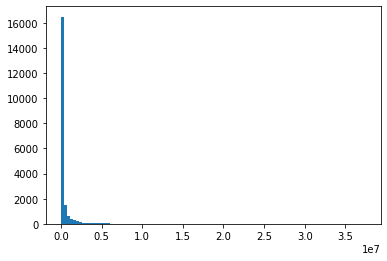

In [501]:
plt.hist(y_train, bins=100)

In [ ]:
X_train.shape

(20223, 1631)

## 8. Principle Component Analysis (PCA)
The resulting dataframe is high-dimensionality, so PCA can reduce the complexity.

In [502]:
X_train

array([[-0.93041996, -0.46568247,  1.32664842, ..., -0.46831911,
        -0.42074528, -0.18505225],
       [-1.31369677, -0.18445089,  0.32540507, ..., -0.46831911,
        -0.42074528, -0.18505225],
       [ 0.98282247, -0.33888648, -0.23879984, ..., -0.46831911,
        -0.42074528, -0.18505225],
       ...,
       [-1.78808036, -0.39616424, -0.44532229, ..., -0.46831911,
         2.37673495, -0.18505225],
       [ 0.50843888, -0.80225129, -0.29684732, ..., -0.46831911,
        -0.42074528, -0.18505225],
       [ 1.36609928, -0.98434534,  0.48956077, ..., -0.46831911,
        -0.42074528, -0.18505225]])

In [511]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
pca.fit(X)
X_embed = pca.transform(X)
print('Maintaining 0.95 Variance...')
print('original number of features:', X.shape[1])
print('PCA number of features:', len(pca.components_))
print('average variance:', np.mean(pca.explained_variance_))


Maintaining 0.95 Variance...
original number of features: 25
PCA number of features: 18
average variance: 1.3292700360654583


## 9. Ensemble method
Leverage an ensemble learning method to generate anoptimized predictive model.

## 10. Cross Validation
K-Fold Cross-validation to the training regumen for both ensemble and single regression models. (optionally, employ `StratifiedShuffleSplit` as well to ensure equitable distribution along a key parameter).

## 11. GridSearch
Leverage gridsearch or an equivalent parameter tuning approach to optimize parameters to your predictive model (note: can likely merge the gridsearch and cross-validation steps).

## 12. Experimenting with Custom Models
Free range to employ any of the tools learned in class, along with any additional tools or techniques researched independently.

Ideas:
- Autoregression
- ARIMA Method
- other timeseries methods